<a href="https://colab.research.google.com/github/braingeneers/experiment/blob/master/ingest/view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Load and view data from the 11-12-2018 MEA organoid experiments at UCSF. Click on the 'Open in Colab' button above to open, run, and edit in Google's free Jupyter notebook server. Read, comment and ask questions via [this github issue](https://github.com/braingeneers/experiment/issues/1).

Notes from the 4 separate experiments performed:

_1 & 2: Baseline recordings made w/o organoid but with media (brain serum). Then organoid added and recordings made with various filter settings on the MEA board._

_3 & 4: Recordings start with organoid in place. Then KCl was added via pipette. Recording continued through addition and after._

_All: 16 outputs, 4 of which were not touching_

See the [ingest notebook](https://github.com/braingeneers/experiment/blob/master/ingest/ingest.ipynb) for details on how the raw files were imported, wrangled and stored in S3 for public access. The full list of files is at the bottom of the ingest notebook.

In [13]:
import os
import pprint
import requests
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Set default plot size
plt.rcParams['figure.figsize'] = (15.0, 5.0)

In [14]:
base_url = "https://s3.nautilus.optiputer.net/braingeneers/mea/ucsf/11-12-2018"

def load_experiment(path):
    """ 
    Load signal and metadata stored in S3 via the ingest notebook. 
    Returns:
    X = signal vector of microvolt time series readings, one for each of the channels
    t = time in milliseconds for each reading (for conveniance, all samples at fs)
    fs = sample rate
    metadata = all of the metadata associated with this experiment
    """
    metadata = requests.get("{}/{}.json".format(base_url, path)).json()
    fs = metadata["frequency_parameters"]["amplifier_sample_rate"]
    with np.DataSource(None).open("{}/{}.npy".format(base_url, path), "rb") as f:
        X = np.load(f)
    # Convert from 16 bit unsigned int to signed floating point microvolts array as per Intam sample code
    X = np.multiply(0.195, (X.astype(np.int32) - 32768))

    t = np.linspace(0, 1000 * X.shape[1] / fs, X.shape[1])   
    return X, t, fs, metadata

# Baseline

First let's look at the baseline _neuronal fluid only_ in the well.

In [15]:
X, t, fs, metadata = load_experiment("organoid-1/recording_background_181208_125938")
print("Loaded {}\n comprising {} channels of {} samples over {} seconds".format(
    metadata["source_file_path"], *X.shape, t[-1] // 1000))
print("frequency_parameters metadata:")
pprint.pprint(metadata["frequency_parameters"])

Loaded mea/ucsf/11-12-2018/organoid 1/recording_background_181208_125938.rhd
 comprising 16 channels of 754560 samples over 37.0 seconds
frequency_parameters metadata:
{'actual_dsp_cutoff_frequency': 0.7772186398506165,
 'actual_impedance_test_frequency': 1000.0,
 'actual_lower_bandwidth': 0.09452909976243973,
 'actual_upper_bandwidth': 7603.76513671875,
 'amplifier_sample_rate': 20000.0,
 'aux_input_sample_rate': 5000.0,
 'board_adc_sample_rate': 20000.0,
 'board_dig_in_sample_rate': 20000.0,
 'desired_dsp_cutoff_frequency': 1.0,
 'desired_impedance_test_frequency': 1000.0,
 'desired_lower_bandwidth': 0.10000000149011612,
 'desired_upper_bandwidth': 7500.0,
 'dsp_enabled': 1,
 'notch_filter_frequency': 0,
 'supply_voltage_sample_rate': 333.3333333333333}


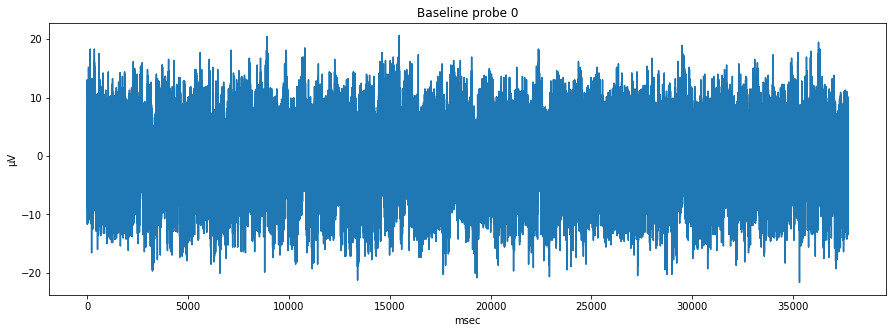

In [16]:
plt.plot(t, X[0])
plt.title("Baseline probe 0")
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

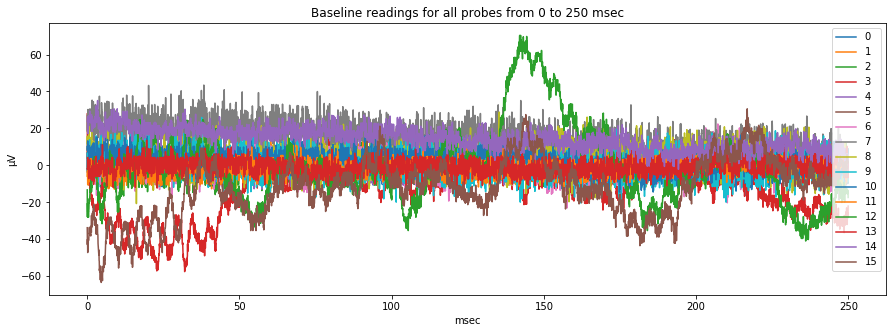

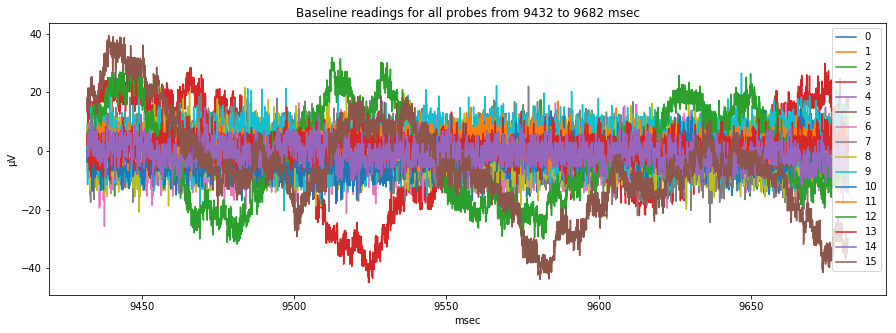

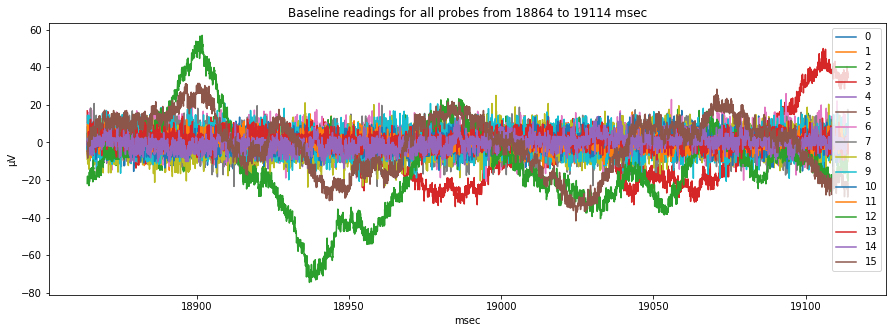

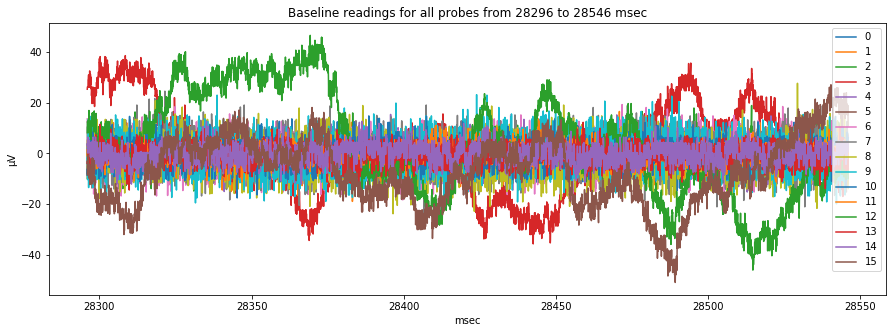

In [17]:
for j in range(4):
    start = j * (X.shape[1] // 4)
    end = start + int(fs) // 4
    for i in range(X.shape[0]):
        plt.plot(t[start:end], X[i][start:end], label=str(i))
    plt.legend(loc='upper right')
    plt.title("Baseline readings for all probes from {} to {} msec".format(int(t[start]), int(t[end])))
    plt.xlabel("msec")
    plt.ylabel("μV")
    plt.show()

Note: 4 of the pads were _not touching_ - possibly red, green and brown?

Let's look at the frequency spectrum...

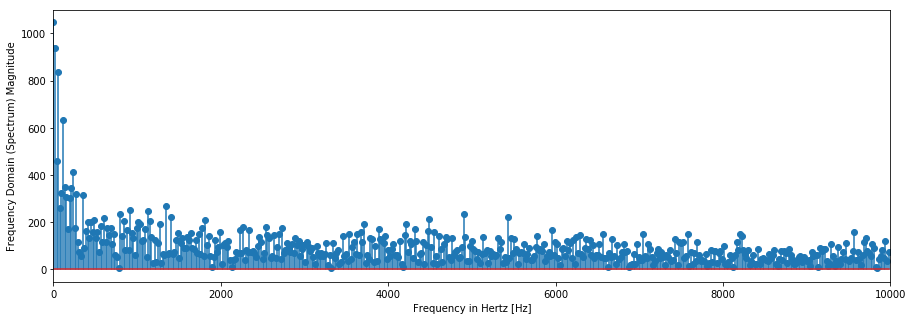

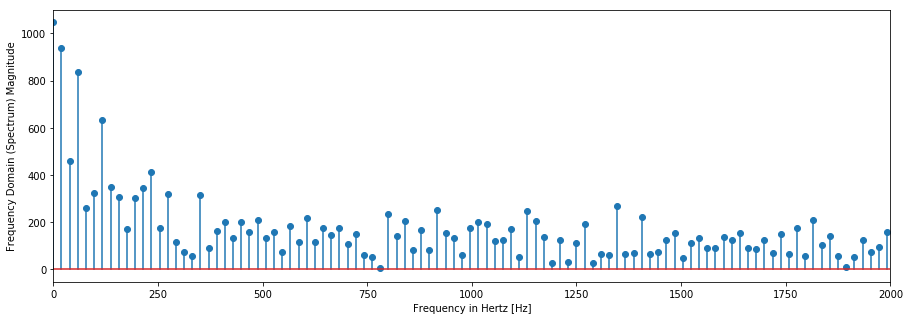

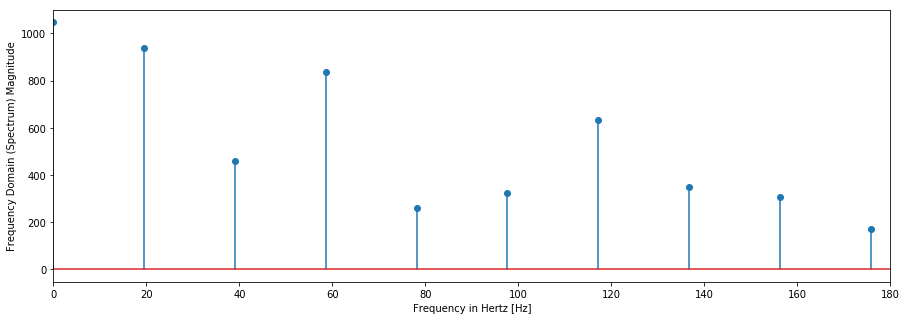

In [18]:
fft = scipy.fftpack.fft(X[0][0:1024])
freqs = scipy.fftpack.fftfreq(len(X[0][0:1024])) * fs

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, fs / 2)
plt.show()

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, 2000)
plt.show()

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, 180)
plt.show()

Almost all of the spectrum is below 1kHz. Lets look at the spectrum of the baseline with a 100Hz high pass filter

In [19]:
X, t, fs, metadata = load_experiment("organoid-1/recording_2_100Hz-high-pass_181208_122907")
print("Loaded {}\n comprising {} channels of {} samples over {} seconds".format(
    metadata["source_file_path"], *X.shape, t[-1] // 1000))
print("frequency_parameters metadata:")
pprint.pprint(metadata["frequency_parameters"])

Loaded mea/ucsf/11-12-2018/organoid 1/recording_2_100Hz high pass_181208_122907.rhd
 comprising 17 channels of 1200240 samples over 60.0 seconds
frequency_parameters metadata:
{'actual_dsp_cutoff_frequency': 0.7772186398506165,
 'actual_impedance_test_frequency': 1000.0,
 'actual_lower_bandwidth': 0.09452909976243973,
 'actual_upper_bandwidth': 7603.76513671875,
 'amplifier_sample_rate': 20000.0,
 'aux_input_sample_rate': 5000.0,
 'board_adc_sample_rate': 20000.0,
 'board_dig_in_sample_rate': 20000.0,
 'desired_dsp_cutoff_frequency': 1.0,
 'desired_impedance_test_frequency': 1000.0,
 'desired_lower_bandwidth': 0.10000000149011612,
 'desired_upper_bandwidth': 7500.0,
 'dsp_enabled': 1,
 'notch_filter_frequency': 0,
 'supply_voltage_sample_rate': 333.3333333333333}


The metadata doesn't seem to indicate a filter was present...let's look at the spectrum:

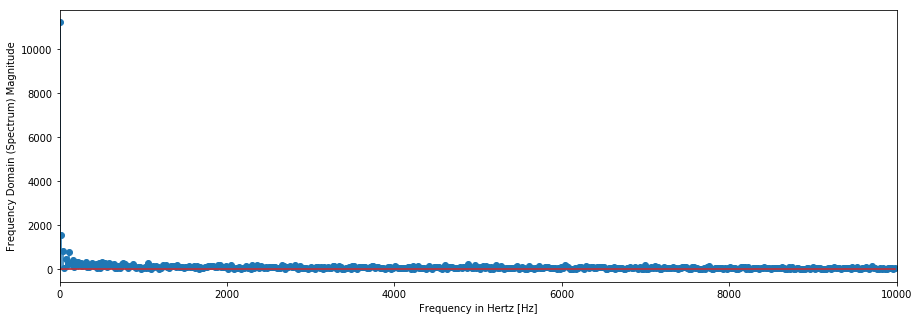

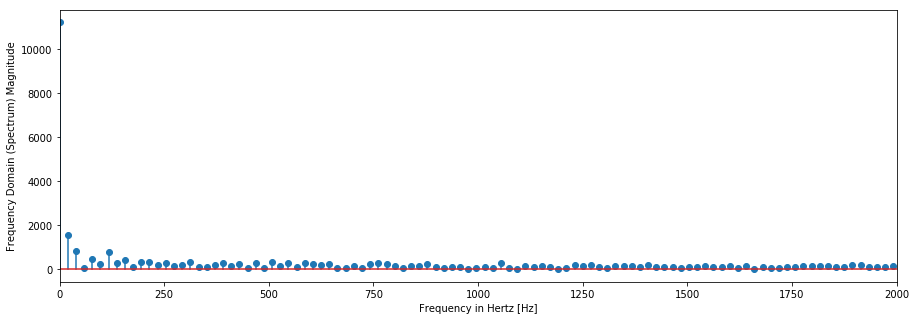

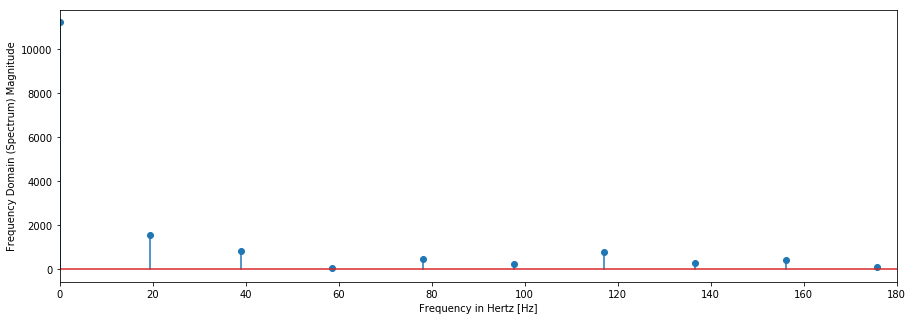

In [20]:
fft = scipy.fftpack.fft(X[0][0:1024])
freqs = scipy.fftpack.fftfreq(len(X[0][0:1024])) * fs

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, fs / 2)
plt.show()

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, 2000)
plt.show()

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, 180)
plt.show()

# KCl

Let's look at the experiments where KCl was added to the organoid half way through the recording.

In [21]:
X, t, fs, metadata = load_experiment("organoid-4/recording_4_wt-40mM-KCl_181208_143057")
print("Loaded {}\n comprising {} channels of {} samples over {} seconds".format(
    metadata["source_file_path"], *X.shape, t[-1] // 1000))
print("frequency_parameters metadata:")
pprint.pprint(metadata["frequency_parameters"])

Loaded mea/ucsf/11-12-2018/organoid 4/recording_4_wt 40mM KCl_181208_143057.rhd
 comprising 16 channels of 1200240 samples over 60.0 seconds
frequency_parameters metadata:
{'actual_dsp_cutoff_frequency': 0.7772186398506165,
 'actual_impedance_test_frequency': 1000.0,
 'actual_lower_bandwidth': 0.09452909976243973,
 'actual_upper_bandwidth': 7603.76513671875,
 'amplifier_sample_rate': 20000.0,
 'aux_input_sample_rate': 5000.0,
 'board_adc_sample_rate': 20000.0,
 'board_dig_in_sample_rate': 20000.0,
 'desired_dsp_cutoff_frequency': 1.0,
 'desired_impedance_test_frequency': 1000.0,
 'desired_lower_bandwidth': 0.10000000149011612,
 'desired_upper_bandwidth': 7500.0,
 'dsp_enabled': 1,
 'notch_filter_frequency': 0,
 'supply_voltage_sample_rate': 333.3333333333333}


First let's look at a few probes over the entire experiment

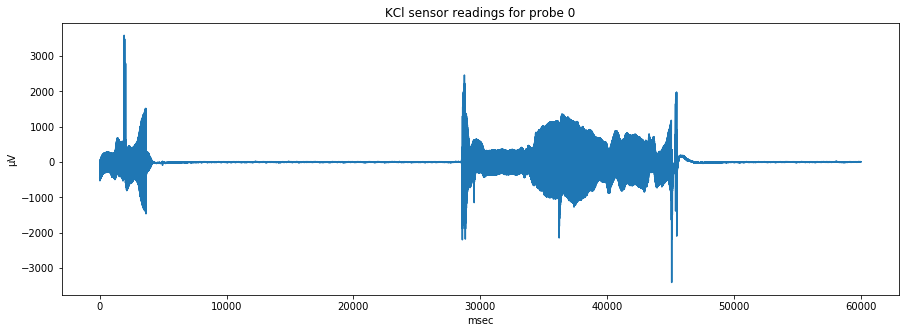

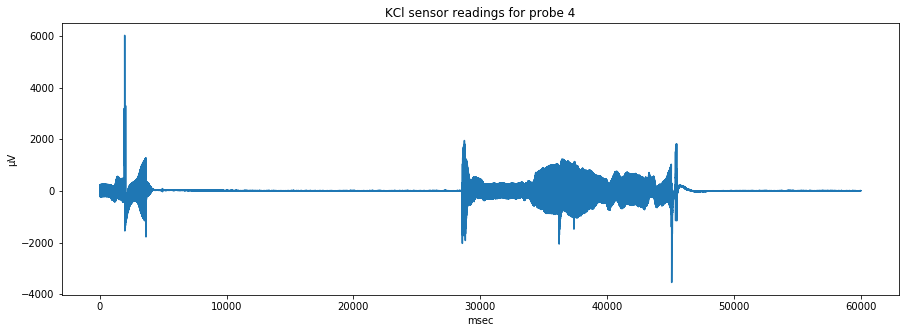

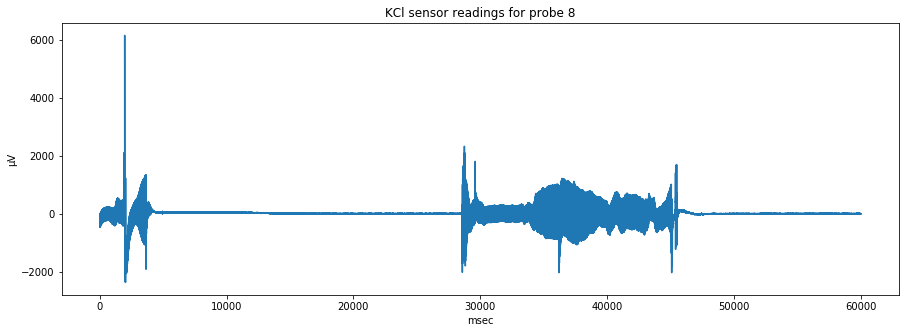

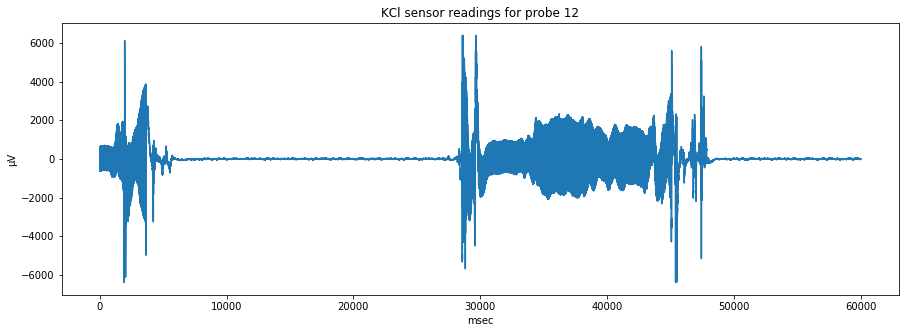

In [22]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
for i in range(0, X.shape[0], 4):
    plt.plot(t, X[i], label=str(i))
    plt.title("KCl sensor readings for probe {}".format(i))
    plt.xlabel("msec")
    plt.ylabel("μV")
    plt.show()

Looks like the KCl was added around 28000 msec and had some impact through 48000. Let's look at signals before and in the middle of that segment:

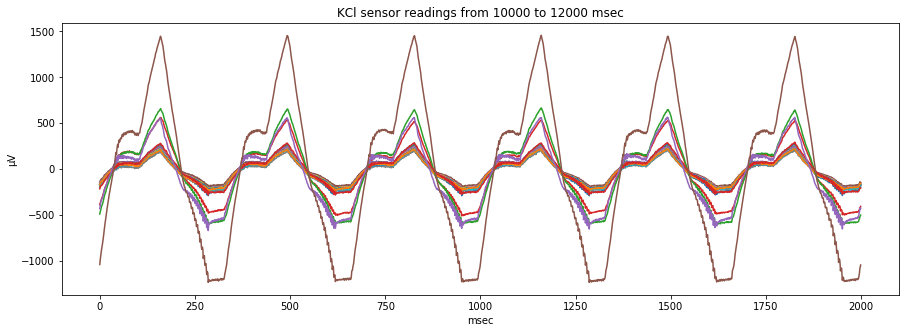

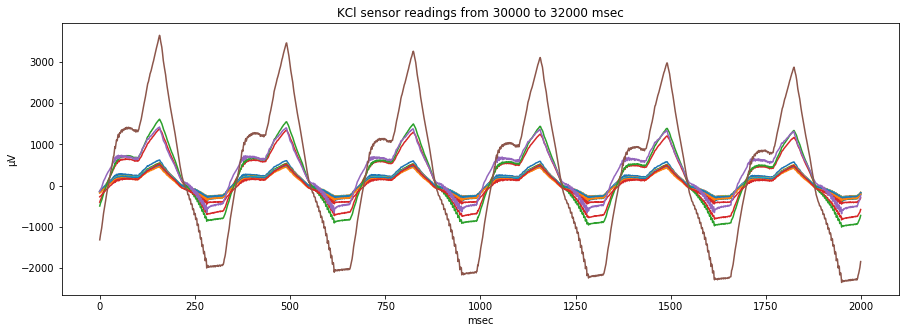

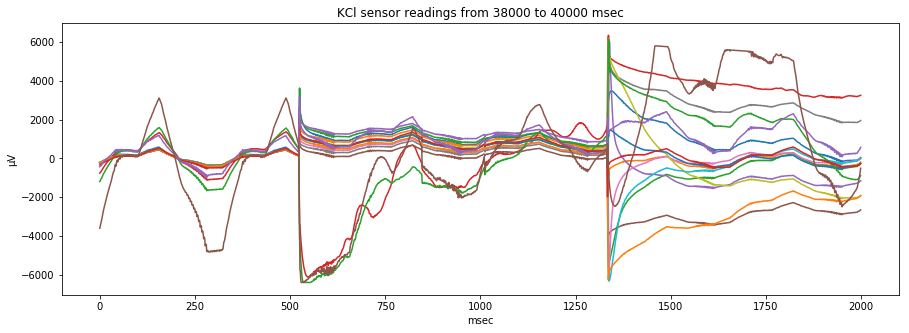

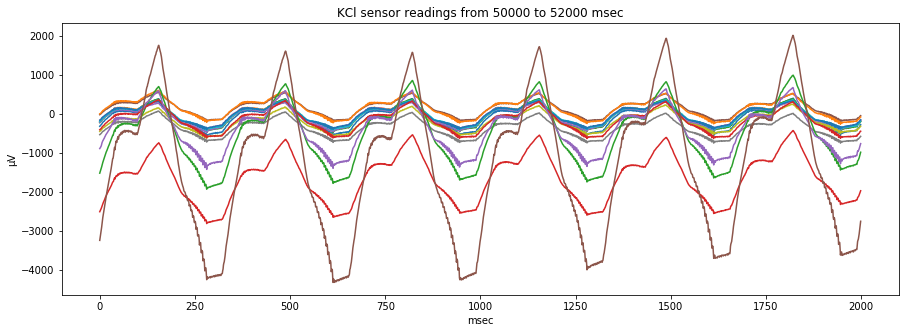

In [23]:
start = 10000
end = start + 2000
for i in range(X.shape[0]):
    plt.plot(X[i][start:end])
plt.title("KCl sensor readings from {} to {} msec".format(start, end))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()


start = 30000
end = start + 2000
for i in range(X.shape[0]):
    plt.plot(X[i][start:end])
plt.title("KCl sensor readings from {} to {} msec".format(start, end))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

start = 38000
end = start + 2000
for i in range(X.shape[0]):
    plt.plot(X[i][start:end])
plt.title("KCl sensor readings from {} to {} msec".format(start, end))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

start = 50000
end = start + 2000
for i in range(X.shape[0]):
    plt.plot(X[i][start:end])
plt.title("KCl sensor readings from {} to {} msec".format(start, end))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()